1/1 [==============================] - 0s 98ms/step


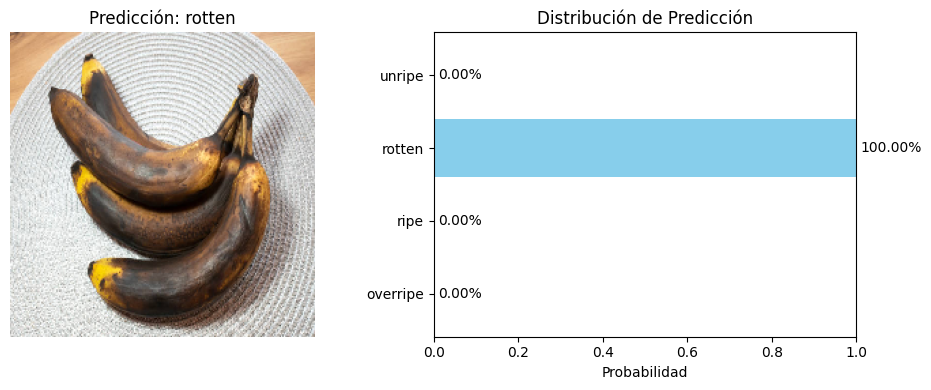

{'img': <PIL.Image.Image image mode=RGB size=224x224>,
 'prediction': array([6.3878027e-09, 3.4976363e-21, 1.0000000e+00, 1.7092458e-31],
       dtype=float32),
 'predicted_index': 2,
 'predicted_label': 'rotten',
 'img_path': 'imagenes/rotten.jpg'}

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications import resnet50, vgg16, xception

# ========== CONFIGURACIÓN MANUAL ==========
# Cambia estos valores según el modelo que vayas a probar
modelo_nombre = "VGG16"  # "ResNet50", "VGG16", "Xception"
modelo_path = "modelos/VGG16/VGG16_001_12.h5"
ruta_imagen = "imagenes/rotten.jpg"

# Diccionario de clases (en el mismo orden que se usó en entrenamiento)
class_indices = {
    'overripe': 0,
    'ripe': 1,
    'rotten': 2,
    'unripe': 3
}

# ===========================================

# Definir parámetros según modelo
if modelo_nombre.lower() == "resnet50":
    preprocess = resnet50.preprocess_input
    target_size = (224, 224)
elif modelo_nombre.lower() == "vgg16":
    preprocess = vgg16.preprocess_input
    target_size = (224, 224)
elif modelo_nombre.lower() == "xception":
    preprocess = xception.preprocess_input
    target_size = (299, 299)
else:
    raise ValueError("Modelo no soportado. Usa 'ResNet50', 'VGG16' o 'Xception'.")

# Cargar modelo
model = load_model(modelo_path)

# Convertir diccionario a lista ordenada
class_labels = [None] * len(class_indices)
for label, index in class_indices.items():
    class_labels[index] = label

def predict_banana_ripeness(img_path):
    """
    Realiza la predicción del estado de maduración del banano.
    
    Args:
        img_path (str): Ruta de la imagen a predecir
    
    Returns:
        dict: Diccionario con los resultados de la predicción conteniendo:
            - img: Imagen cargada y procesada
            - prediction: Array de probabilidades para cada clase
            - predicted_index: Índice de la clase predicha
            - predicted_label: Etiqueta de la clase predicha
            - img_path: Ruta original de la imagen
    """
    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess(img_array_expanded)
    
    # Realizar predicción
    prediction = model.predict(img_preprocessed)
    predicted_index = np.argmax(prediction)
    predicted_label = class_labels[predicted_index]
    
    # Retornar resultados estructurados
    return {
        'img': img,
        'prediction': prediction[0],
        'predicted_index': predicted_index,
        'predicted_label': predicted_label,
        'img_path': img_path
    }


def show_prediction_results(prediction_results):
    """
    Visualiza los resultados de la predicción de maduración del banano.
    
    Args:
        prediction_results (dict): Diccionario con resultados de predicción 
                                 obtenido de predict_banana_ripeness()
    """
    # Extraer datos del diccionario de resultados
    img = prediction_results['img']
    prediction = prediction_results['prediction']
    predicted_label = prediction_results['predicted_label']
    predicted_index = prediction_results['predicted_index']
    img_path = prediction_results['img_path']
    
    # Crear visualización
    plt.figure(figsize=(10, 4))
    
    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicción: {predicted_label}")
    
    # Gráfico de barras de probabilidades
    plt.subplot(1, 2, 2)
    plt.barh(class_labels, prediction, color='skyblue')
    plt.xlabel("Probabilidad")
    plt.title("Distribución de Predicción")
    plt.xlim(0, 1)
    
    # Mostrar porcentajes sobre las barras
    for i, v in enumerate(prediction):
        plt.text(v + 0.01, i, f"{v:.2%}", va='center')
    
    plt.tight_layout()
    plt.show()
    

# Función de conveniencia que combina ambas funciones
def predict_and_show(img_path):
    results = predict_banana_ripeness(img_path)
    show_prediction_results(results)
    return results

# Ejecutar
predict_and_show(ruta_imagen)